https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Import data

In [3]:
df_raw = pd.read_csv('sales_and_bills.csv', index_col=0)
df_raw.head()

,Code,Year,Sales,Bills
0,110,1999,16147961.00,180
1,110,2000,45873960.00,267
2,110,2001,40402180.00,214
3,110,2002,232776.31,218
4,110,2003,331355.00,316


# Some Visualizations

(array([8.461e+03, 6.850e+02, 2.700e+02, 1.050e+02, 6.700e+01, 2.500e+01,
        1.100e+01, 1.900e+01, 7.000e+00, 3.000e+00, 7.000e+00, 1.000e+00,
        8.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

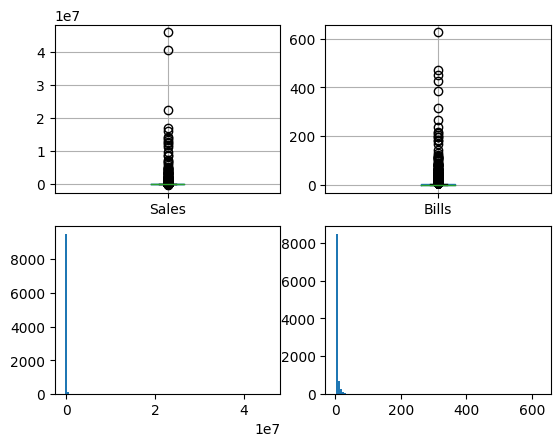

In [15]:
fig, axes = plt.subplots(2, 2)

df_raw.boxplot(column='Sales', ax=axes[0, 0])
df_raw.boxplot(column='Bills', ax=axes[0, 1])
axes[1, 0].hist(x=df_raw.Sales, bins=100)
axes[1, 1].hist(x=df_raw.Bills, bins=100)
